In [48]:
import math
import torch
import matplotlib
import matplotlib.pyplot as plt

from norse.torch.functional import receptive_field
import importlib
importlib.reload(receptive_field)

<module 'norse.torch.functional.receptive_field' from '/home/jens/norse/norse/torch/functional/receptive_field.py'>

In [49]:
def kernel_color_norm(k):
    vmin = min(k.min(), -1e-5)
    vmax = max(k.max(), 1e-5)
    return matplotlib.colors.TwoSlopeNorm(vcenter=0, vmin=vmin, vmax=vmax)

def plot_rings(rings, rows=None, cols=None, **kwargs):
    kernels = rings.clone()
    if kernels.ndim == 4:
        kernels = kernels.flatten(0, 1)
    s = math.sqrt(kernels.shape[0])
    plot_ratio = s / math.sqrt(2)
    if rows is None:
      rows = math.ceil(plot_ratio)
    if cols is None:
      cols = math.ceil(kernels.shape[0] / plot_ratio)
    fig = plt.figure(**kwargs)
    for i in range(kernels.shape[0]):
        ax = fig.add_subplot(rows, cols, i + 1)
        norm = kernel_color_norm(kernels[i])
        ax.imshow(kernels[i], cmap="bwr", norm=norm)
        ax.set_xticks([])
        ax.set_yticks([])


13.5


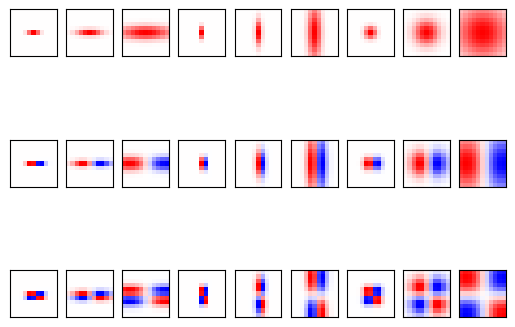

In [50]:
plot_rings(receptive_field.spatial_receptive_fields_with_derivatives(3, 2, 2, 11, [(0, 0), (0, 1), (1, 1)]), rows=3, cols=9)